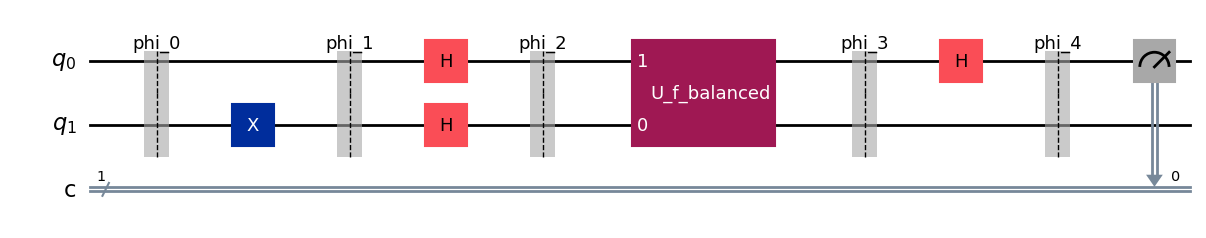

In [12]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.circuit.library import UnitaryGate
import numpy as np

# Flips the input
U_f_balanced = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 0, 1],
    [0, 0, 1, 0]
])

# Maps all input to 0:
U_f_constant = np.array([ 
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 1]
])


de = QuantumCircuit(2, 1)
de.save_statevector(label="phi_0")
# Step 1: Flip bottom bit to ket 1
de.x(1)
de.save_statevector(label="phi_1")


# Step 2: Put both bits through hadamard matrices
de.h(0)
de.h(1)
#de.measure(1,0)
de.save_statevector(label="phi_2")

# Step 3: Apply the unitary matrix representing the function f
#U_f = UnitaryGate(U_f_constant, label="U_f_constant")
U_f = UnitaryGate(U_f_balanced, label="U_f_balanced")
de.append(U_f, [1, 0])
de.save_statevector(label="phi_3")

# Step 4: Put the top bit through a hadamard matrix
de.h(0)
de.save_statevector(label="phi_4")

# Step 5: Measure the top qubit
de.measure(0,0)

de.draw("mpl")

In [13]:
simulator = Aer.get_backend('aer_simulator')

# Transpile the circuit for the backend
compiled_circuit = transpile(de, simulator)

# Run the circuit
result = simulator.run(compiled_circuit, shots=100000).result()

# Get and print the counts
counts = result.get_counts()
print("Measurement results:", counts)
# Retrieve states
state_0 = result.data(0)["phi_0"]
state_1 = result.data(0)["phi_1"]
state_2 = result.data(0)["phi_2"]
state_3 = result.data(0)["phi_3"]
state_4 = result.data(0)["phi_4"]
from qiskit.quantum_info import Statevector
print("Phi 0:\n", Statevector(state_0))
print("Phi 1:\n", Statevector(state_1))
print("Phi 2:\n", Statevector(state_2))
print("Phi 3:\n", Statevector(state_3))
print("Phi 4:\n", Statevector(state_4))

Measurement results: {'1': 100000}
Phi 0:
 Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))
Phi 1:
 Statevector([0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
            dims=(2, 2))
Phi 2:
 Statevector([ 0.5-6.123234e-17j,  0.5-6.123234e-17j, -0.5+6.123234e-17j,
             -0.5+6.123234e-17j],
            dims=(2, 2))
Phi 3:
 Statevector([ 0.5-6.123234e-17j, -0.5+6.123234e-17j, -0.5+6.123234e-17j,
              0.5-6.123234e-17j],
            dims=(2, 2))
Phi 4:
 Statevector([ 5.55111512e-17+4.32978028e-17j,
              7.07106781e-01-1.29893408e-16j,
             -1.66533454e-16-4.32978028e-17j,
             -7.07106781e-01+1.29893408e-16j],
            dims=(2, 2))
